## Data science group project 

## Data:  
Number of transports by different types of passengers

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE


In [7]:
data = pd.read_csv("Untitled Folder/Bus Card Type.xlsx - Bus Card Type.csv.csv")
data.head()

,Date,Adult,Child/Youth,Concession,Employee,Free Travel,School Student,Senior/Pensioner,On Demand,CTP,Day Pass Child/Youth w/o SAF,Day Pass without SAF,Monthly passengers
0,16-Jul,"390,433","62,800","136,064",0,"1,149","138,642","206,110",0,0,0,0,"935,198"
1,16-Aug,"386,386","67,010","73,590",0,"1,281","296,261","224,668",0,0,0,0,"1,049,196"
2,16-Sep,"370,068","70,022","61,676",0,"1,320","203,827","218,598",0,0,0,0,"925,511"
3,16-Oct,"381,402","78,951","60,635",0,"1,410","197,558","227,088",0,0,0,0,"947,044"
4,16-Nov,"405,245","76,328","57,858",0,"1,462","255,994","236,965",0,0,0,0,"1,033,852"


In [8]:
data.shape

(62, 13)

In [9]:
data.tail()

,Date,Adult,Child/Youth,Concession,Employee,Free Travel,School Student,Senior/Pensioner,On Demand,CTP,Day Pass Child/Youth w/o SAF,Day Pass without SAF,Monthly passengers
57,21-Apr,"271,849","52,658","36,117","1,944","1,353","69,598","176,368","8,887","101,192",1,99,"720,066"
58,21-May,"289,229","42,457","42,044","1,967","1,329","132,272","183,225","10,133","106,754",0,147,"809,557"
59,21-Jun,"259,924","34,715","32,919","1,314","1,081","102,099","163,825","9,366","97,027",0,95,"702,365"
60,21-Jul,"127,354","11,205","10,461",513,488,"1,276","75,935",0,"48,652",0,79,"275,963"
61,21-Aug,"102,883","6,708","7,436",480,389,"1,501","63,463",0,"39,328",1,81,"222,270"


In [10]:
## converted the Date column to a Data type which can be used for training and testing
data['Date'] = pd.to_datetime( data['Date'], 
 format = '%y-%b',errors = 'raise')
data.Date.head()

0   2016-07-01
1   2016-08-01
2   2016-09-01
3   2016-10-01
4   2016-11-01
Name: Date, dtype: datetime64[ns]

<AxesSubplot:xlabel='Date', ylabel='million'>

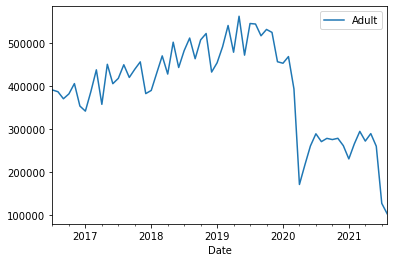

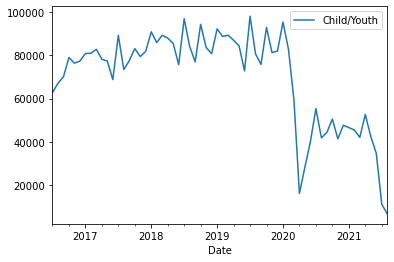

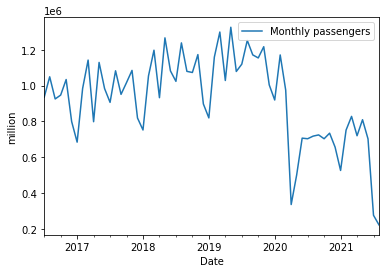

In [47]:
data.plot(x='Date',y='Adult')
data.plot(x='Date',y='Child/Youth')
data.plot(ylabel='million',x='Date',y='Monthly passengers')

### Number Forty-four is the month number before the implementation of first lockdown in 2020

In [11]:
reg = linear_model.LinearRegression()
x = data[['Date']]
y = data['Monthly passengers']
reg.fit(x[:44], y[:44])
print("y = x *", reg.coef_, "+", reg.intercept_)


ValueError: could not convert string to float: '935,198'

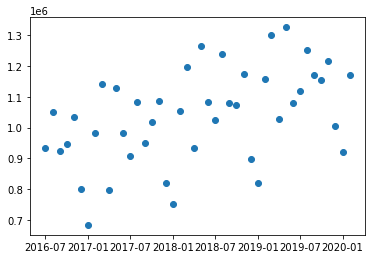

In [61]:
## The number of Monthly passengers before the lockdown (Month number 44, Mar-20)
plt.plot(x[:44], y[:44], 'o')




In [78]:
no_covid=(data['Monthly passengers'][:44])
no_covid.sum()

45763020

In [70]:
yes_covid=(data['Monthly passengers'][44:])
yes_covid.sum()

11595381

## WE SHOULD make a lot of changes to THE PART BELOW, since X and Y of the linear model have been assigned  values

# IGNORE WHAT'S BELOW FOR NOW

In [128]:
predicted = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)

print("MSE:", mse)
print("R Squared:", r2)

MSE: 117892683779.51591
R Squared: -0.9979454398424579


In [50]:
reg = linear_model.LinearRegression()
X = data[['Month number','Monthly passengers']]
y = data['Adult']
reg.fit(X, y)

print("y =X *", reg.coef_, "+", reg.intercept_)

y =X * [-316.21102035    0.40868006] + 24585.49152298912


In [32]:
train, test = train_test_split(data, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(49, 14)
(13, 14)


In [33]:
x_train = data[['Month number','Monthly passengers']]
y_train = data['Adult']
x_test = data[['Month number','Monthly passengers']]
y_test = data['Adult']
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-316.21102035    0.40868006] + 24585.49152298912


In [157]:
predicted=reg.predict(x_train)
mse = ((np.array(y_train)-predicted)**2).sum()/len(y_train)
r2 = r2_score(y_train, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 1228802316.7393878
R Squared: 0.8943003617196154


In [162]:
reg.predict(x_train[:3])

array([406782.26306095, 453054.76112871, 402190.95731231])

# Questions:
1.

2.